<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](git@github.com:ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [5.2 Lasso Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.02-Contributed-Example.html) | [Contents](toc.html) | [6.0 Adjoint-Based Local Sensitivity Analysis](https://ndcbe.github.io/cbe67701-uncertainty-quantification/06.00-Adjoint-Based-Local-Sensitivity-Analysis.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/05.03-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.03-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 5.3 Elastic Net Regression

Created by Chenguang Zhang (czhang9@nd.edu)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

This example was adapted from:

McClarren, Ryan G (2018). Uncertainty Quantification and Predictive Computational Science: A Foundation for Physical Scientists and Engineers, Chapter 4: Local Sensitivity Analysis Based on Derivative Approximations, Springer, https://doi.org/10.1007/978-3-319-99525-0_4

## 5.3.1 Elastic Net Regression Definition
The elastic net penalty Combines both ridge and lasso penalties:

\begin{equation*}
\widehat{\mathbf{\beta}}_{el}=\min_{\beta}\sum ^{I}_{i=1}(y_i- \mathbf{\beta} \cdot \mathbf{x}_i)^2 + \lambda_1\left \| \mathbf{\beta} \right \|_1 +  \lambda_2\left \| \mathbf{\beta} \right \|_2^2
\end{equation*}

The first term from lasso encourages sparseness in the coefficients. The second term encourages highly correlated features to be averaged.

## 5.3.2 Comparison of Different Regularized Regression Methods
This is an example adapted from the book. We are going to fit a 100-parameter data set with 5 dominating inputs using `ElasticNet` from `sklearn`. for the time being, Latin hypercube sampling is not used.

The `alpha` and `l1_ratio` in `ElasticNet` correspond to $\lambda_1+\lambda_2$ and $\alpha$ in the book:

$\lambda_1=$`alpha * l1_ratio`

$\lambda_2=$`0.5 * alpha * (1 - l1_ratio)`

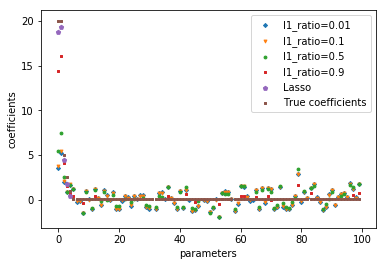

In [2]:
# Generate Samples
np.random.seed(2020)

n_samples, n_features = 40, 100
X = np.random.randn(n_samples, n_features)
sensitivities = np.array([20, 20, 5, 2.5, 1] + [0.1] * (n_features-5)).reshape(n_features,1)
y = np.dot(X, sensitivities) + np.random.normal(scale = 0.01, size=n_samples).reshape(n_samples, 1)

# Define Elastic Net Models
enet0 = ElasticNet(alpha=1, l1_ratio=0.01, max_iter=1000000)
enet1 = ElasticNet(alpha=1, l1_ratio=0.1, max_iter=1000000)
enet2 = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=1000000)
enet3 = ElasticNet(alpha=1, l1_ratio=0.9, max_iter=1000000)
enet4 = ElasticNet(alpha=1, l1_ratio=1, max_iter=1000000)

# Fitting the data
enet0.fit(X, y)
enet1.fit(X, y)
enet2.fit(X, y)
enet3.fit(X, y)
enet4.fit(X, y)

m = plt.scatter(np.where(enet0.coef_)[0], enet0.coef_[enet0.coef_ != 0], s = 8, marker= 'D', label='l1_ratio=0.01')
m = plt.scatter(np.where(enet1.coef_)[0], enet1.coef_[enet1.coef_ != 0], s = 8, marker= 'v', label='l1_ratio=0.1')
m = plt.scatter(np.where(enet2.coef_)[0], enet2.coef_[enet2.coef_ != 0], s = 8, marker= 'o', label='l1_ratio=0.5')
m = plt.scatter(np.where(enet3.coef_)[0], enet3.coef_[enet3.coef_ != 0], s = 8, marker= 's', label='l1_ratio=0.9')
m = plt.scatter(np.where(enet4.coef_)[0], enet4.coef_[enet4.coef_ != 0], s = 20, marker= 'p', label='Lasso')

m = plt.scatter(np.where(sensitivities)[0], sensitivities[sensitivities != 0], s=2, marker=',', label='True coefficients')

plt.legend(loc='best')
plt.xlabel('parameters')
plt.ylabel('coefficients')
plt.show()

## 5.3.3 Cross-Validation
Cross-validation is often used to choose the best parameters for the regression models. We can split the data into training set and test set. We can fit the data in the training set to obtain parameters for our model and evaluate them with the test set. `sklearn` has built-in cross-validation module.

selected alpha =  0.04032425312430713


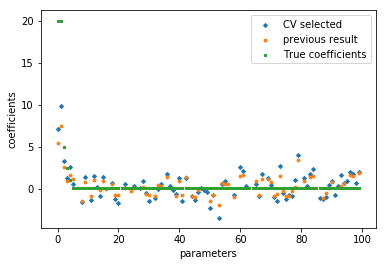

In [3]:
# 5-fold CV
enetCV = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=0)

enetCV.fit(X, y.ravel())

print("selected alpha = ", enetCV.alpha_)

m = plt.scatter(np.where(enetCV.coef_)[0], enetCV.coef_[enetCV.coef_ != 0], s = 8, marker= 'D', label='CV selected')
m = plt.scatter(np.where(enet2.coef_)[0], enet2.coef_[enet2.coef_ != 0], s = 8, marker= 'o', label='previous result')
m = plt.scatter(np.where(sensitivities)[0], sensitivities[sensitivities != 0], s=2, marker=',', label='True coefficients')
plt.legend(loc='best')
plt.xlabel('parameters')
plt.ylabel('coefficients')
plt.show()

## 5.3.4 Boston Housing
In this session, we play with the toy dataset in `sklearn` using elastic net regression to check the sensitivities of each parameters. To keep it simple, data transforming is not performed. The demo is for general informational and educational purposes only and is not intended to constitute legal, tax, accounting or investment advice.

The dataset contains 13 parameters:

1. CRIM: This is the per capita crime rate by town
2. ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This is the proportion of non-retail business acres per town.
4. CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
5. NOX: This is the nitric oxides concentration (parts per 10 million)
6. RM: This is the average number of rooms per dwelling
7. AGE: This is the proportion of owner-occupied units built prior to 1940
8. DIS: This is the weighted distances to five Boston employment centers
9. RAD: This is the index of accessibility to radial highways
10. TAX: This is the full-value property-tax rate per \$10,000
11. PTRATIO: This is the pupil-teacher ratio by town
12. B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
13. LSTAT: This is the percentage lower status of the population


Best l1_ratio and alpha: 0.900000, 0.805356


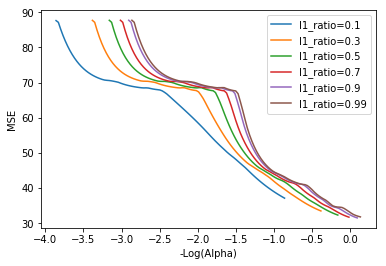

{'CRIM': -0.07392833833984348, 'ZN': 0.05088507817029059, 'INDUS': -0.0, 'CHAS': 0.0, 'NOX': -0.0, 'RM': 1.4069154137446531, 'AGE': 0.014931950154661781, 'DIS': -0.7875608592015684, 'RAD': 0.28081892911842243, 'TAX': -0.01580935356640846, 'PTRATIO': -0.7478183292294582, 'B': 0.008658437162296395, 'LSTAT': -0.7303752873453063}


In [4]:
# loading dataset
dataset = load_boston()

X = dataset.data
y = dataset.target


# iterate with different l1_ratios
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
fold = 40
min_mse = 100 # Smallest Mean square error

# Select the CV model with smallest MSE
for rho in l1_ratios:
  enetCV = ElasticNetCV(cv=fold, l1_ratio=rho, random_state=0)
  enetCV.fit(X, y)
  mses = np.mean(enetCV.mse_path_, axis=1)
  mse = mses[np.where(enetCV.alphas_ == enetCV.alpha_)[0][0]] # return mse with the chosen alpha
  m = plt.plot(-np.log10(enetCV.alphas_), mses, label='l1_ratio='+str(rho) )
  if mse < min_mse:
    min_mse = mse
    best_rho = rho
    best_alpha = enetCV.alpha_
    best_sens = enetCV.coef_

print("Best l1_ratio and alpha: %f, %f" % (best_rho, best_alpha))

plt.legend(loc='best')
plt.xlabel('-Log(Alpha)')
plt.ylabel('MSE')
plt.show()

print(dict(zip(dataset.feature_names, best_sens)))

## 5.3.5 Reference


1.   http://lib.stat.cmu.edu/datasets/boston
2.   https://www.programcreek.com/python/example/62034/sklearn.linear_model.ElasticNetCV



<!--NAVIGATION-->
< [5.2 Lasso Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.02-Contributed-Example.html) | [Contents](toc.html) | [6.0 Adjoint-Based Local Sensitivity Analysis](https://ndcbe.github.io/cbe67701-uncertainty-quantification/06.00-Adjoint-Based-Local-Sensitivity-Analysis.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/05.03-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.03-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>